In [18]:
# importing the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
# importing the data 
data = pd.read_csv('gdpdata.csv')
data.head()

,Gross Domestic Product,Petroleum Proffit Tax,VAT,CIT,CED
0,94325.02,6326,403.0,2326.0,11.5
1,101011.23,4847,550.0,2336.0,11.5
2,110064.03,3747,562.0,1984.0,11.6
3,116272.18,4762,787.0,1616.0,11.7
4,134585.59,6711,1004.0,2184.0,11.8


## About the data
### The data is a secondary data obtained from the statistical bulletin of the Central Bank of Nigeria and reports of Federal Inland Revenue Service for a period of 1981 to 2015.

In [20]:
# Data preprocessing
# getting insight about our data, to know if there is any missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
Gross Domestic Product    35 non-null float64
Petroleum Proffit Tax     35 non-null int64
VAT                       35 non-null float64
CIT                       30 non-null float64
CED                       35 non-null float64
dtypes: float64(4), int64(1)
memory usage: 1.4 KB


In [21]:
print("Numbers of years of GDP: "+str(len(data.index))+'years')

Numbers of years of GDP: 35years


## Analyzing The Data

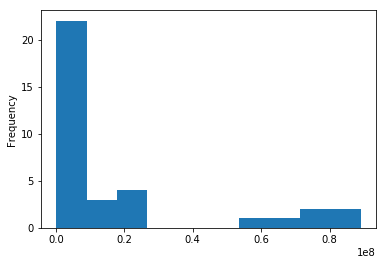

In [22]:
data["Gross Domestic Product"].plot.hist()

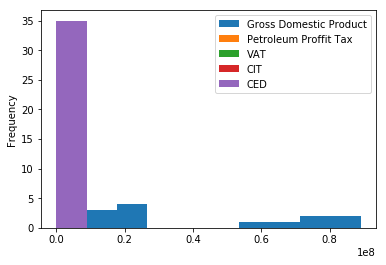

In [23]:
data.plot.hist()

## Data Wrangling i.e Data cleaning

In [24]:
data.isnull().sum()

Gross Domestic Product    0
Petroleum Proffit Tax     0
VAT                       0
CIT                       5
CED                       0
dtype: int64

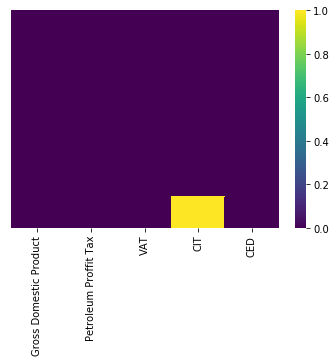

In [25]:
# visualizing the data to see the missing values
sns.heatmap(data.isnull(), yticklabels=False, cmap='viridis')

In [26]:
# Filling the missing data with the mean value of that particular column i.e CIT
data.CIT.fillna(data.CIT.mean(),inplace=True)

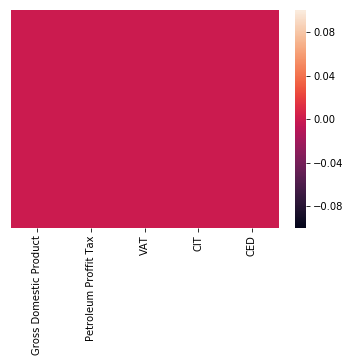

In [27]:
# visualing the data after the missing values has been filled with the column mean
sns.heatmap(data.isnull(), yticklabels=False)

## Train Data

In [28]:
X = data.drop("Gross Domestic Product",axis=1)
y = data["Gross Domestic Product"]

In [29]:
# Splitting the data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1,
                                                 test_size=0.2)

In [30]:
# instantiate the model
lrmodel = LinearRegression()

In [31]:
# fitting the model
lrmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
# making predictions
predictions = lrmodel.predict(X_test)

In [33]:
from sklearn.metrics import r2_score

In [34]:
# Evaluating model performance
r2_score(y_test,predictions)

0.9359759465353579